In [ ]:
# The code was removed by Watson Studio for sharing.

# Industry Accelerators - Sales Prediction using Weather Company Data

## Apply Predictive Models

# Introduction
Now that we have built, stored, and deployed the machine learning models via the 1st notebook (`1-build-predictive-models`), this 2nd notebook (`2-apply-predictive-models`) uses those models 
to score (make predictions with) additional data.

Consequently, this notebook entails the following procedures:
* Programmatically get the ID's for the deployment space and model deployments that were created in the `1-build-predictive-models` notebook.
* Promote assets required for scoring new data into the deployment space.
* Create a deployable function which will take raw data for scoring, prep it into the format required for the models and score it.
* Deploy the function.
* Create the required payload, invoke the deployed function, and return predictions.




Before executing this notebook on IBM Cloud, you need to:<br>
1) When you import this project on an IBM Cloud environment, a project access token should be inserted at the top of this notebook as a code cell. <br>
If you do not see the cell above, Insert a project token: Click on **More -> Insert project token** in the top-right menu section and run the cell <br>

![ws-project.mov](https://media.giphy.com/media/jSVxX2spqwWF9unYrs/giphy.gif)
2) Provide your IBM Cloud API key in the subsequent cell.<br>
3) You can then step through the notebook execution cell by cell, by selecting Shift-Enter. Or you can execute the entire notebook by selecting **Cell -> Run All** from the menu.<br>


#### Insert IBM Cloud API key

Your Cloud API key can be generated by going to the <a href="https://cloud.ibm.com/iam/apikeys" target="_blank" rel="noopener noreferrer">API Keys section of the Cloud console</a>. From that page, scroll down to the **API Keys** section, and click **Create an IBM Cloud API key**. Give your key a name and click **Create**, then copy the created key and paste it below. 

If you are running this notebook on Cloud Pak for Data on-prem, leave the `ibmcloud_api_key` field blank.

In [2]:
ibmcloud_api_key=''

In the cell below we import the python libraries that we will use throughout the notebook. The remaining libraries will be imported from the config scripts. 

### STEP 0.1: Configure Analysis: Import Software Packages, Set Parameters, and Define Custom Functions

The following cells configure the analysis (i.e., import python software packages, set predefined variables (a.k.a. "parameters" a.k.a. "settings"), and define custom functions).

In [3]:

# ----------------------------------------------------------------------------------------------------------------------
# LOAD ANALYSIS CONFIGURATION
# ----------------------------------------------------------------------------------------------------------------------

# import configuration information

from config import*

import string
import random
import sys

loadfile1="fauxsales2.csv"
loadfile2="fauxweather2.csv"

# notify scientist: completed analyses
print("DONE: 'STEP 0.1: Configure Analysis' analysis")

DONE: 'STEP 0.1a: Import Software Packages' analysis
DONE: 'STEP 0.1b: Set Parameters' analysis
DONE: 'STEP 0.1c: Define Custom Functions' analysis
DONE: 'STEP 0.1: Configure Analysis' analysis


### STEP 1.1: Evaluate Data
Ideally and prospectively, this substep simply computes statistics (typically descriptive stats) including analytics-focused or/and business-focused "quality metrics" of the data variables (columns).

In [4]:

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

#
list_loadfile = [loadfile1, loadfile2]

#
for loadfilenow in list_loadfile:
    
    # load data
#     df = pd.read_csv(loadfilenow, dtype=dict_dtypes, parse_dates=[name_columndatetime])
    
    my_file = project.get_file(loadfilenow)
    #my_file.seek(0)
    df = pd.read_csv(my_file)
    
    # compute columnar quality metrics (e.g., nunique, isnan, dtype, min, max, kurtosis): merged client data
    mydfdescribe(df)


# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 1.1: Evaluate Data' analysis")


,dtypes,nunique,count,percent_nan,percent_blank,percent_zero,percent_negative,min,max,kurtosis
date,int64,365,1095,0.0,0.0,0.000000,0.0,20180101,20181231,-1.205738
dateandtime,object,365,1095,0.0,0.0,0.000000,NaN,20180101 00:00:00,20181231 00:00:00,NaN
placeId,int64,3,1095,0.0,0.0,0.000000,0.0,78152,96468,-1.501372
placeName,object,3,1095,0.0,0.0,0.000000,NaN,place_078152,place_096468,NaN
postalcode,int64,3,1095,0.0,0.0,0.000000,0.0,65807,84123,-1.501372
countrycode,object,1,1095,0.0,0.0,0.000000,NaN,us,us,NaN
productname,object,1,1095,0.0,0.0,0.000000,NaN,thingamajig,thingamajig,NaN
producttype,object,1,1095,0.0,0.0,0.000000,NaN,categoryA,categoryA,NaN
discount,float64,3,1095,0.0,0.0,0.345205,0.0,0.0,0.2,-1.509960
closed,bool,2,1095,0.0,0.0,0.989041,0.0,False,True,86.661765


,dtypes,nunique,count,percent_nan,percent_blank,percent_zero,percent_negative,min,max,kurtosis
DewpointLocalAfternoonAvg,float64,867,1095,0.0,0.0,0.0,0.018265,-8.467496e+00,7.097248e+01,-0.413353
DewpointLocalAfternoonMax,float64,351,1095,0.0,0.0,0.0,0.014612,-6.880418e+00,7.159958e+01,-0.444572
DewpointLocalAfternoonMin,float64,356,1095,0.0,0.0,0.0,0.001826,-2.126523e+00,8.031348e+01,-0.372661
DewpointLocalDayAvg,float64,1048,1095,0.0,0.0,0.0,0.000000,4.338456e+00,8.290842e+01,-0.479807
DewpointLocalDayMax,float64,337,1095,0.0,0.0,0.0,0.001826,-5.717628e+00,7.096237e+01,-0.673239
DewpointLocalDayMin,float64,363,1095,0.0,0.0,0.0,0.049315,-2.351862e+01,6.738138e+01,-0.306662
DewpointLocalDaytimeAvg,float64,984,1095,0.0,0.0,0.0,0.029224,-1.258114e+01,6.457887e+01,-0.465803
DewpointLocalDaytimeMax,float64,350,1095,0.0,0.0,0.0,0.000000,1.521229e+00,8.000123e+01,-0.598865
DewpointLocalDaytimeMin,float64,354,1095,0.0,0.0,0.0,0.168950,-3.545458e+01,5.490542e+01,-0.337566
DewpointLocalEveningAvg,float64,880,1095,0.0,0.0,0.0,0.031963,-1.596686e+01,6.686314e+01,-0.466390


DONE: 'STEP 1.1: Evaluate Data' analysis


### STEP 1.2: Transform Data
Typically, this substep derives new variables from the extant ones or/and aggregates values of variables by a single variable or a combination of chosen variables, thereby transforming the data.

In [5]:
# ----------------------------------------------------------------------------------------------------------------------
#
# ----------------------------------------------------------------------------------------------------------------------

# NOTE: For most generality, the code likely must resume a "join all the data then aggregate it" approach rather
#     : than the current "aggregate non-weather data then join weather to it" approach that exploits a presumed
#     : "compute models per location" solution (especially since weather is a location-variant dataset).

# ----------------------------------------------------------------------------------------------------------------------
#
# ----------------------------------------------------------------------------------------------------------------------

# load data: client data
myfile = project.get_file(loadfile1)
#myfile.seek(0)
df1 = pd.read_csv(myfile, dtype=dict_columnsdtypes_client, parse_dates=[name_columndatetime]).\
    rename(columns=dict_columnsrename_client, inplace=False)

# compute independent variables: time-based variables
# todo: brainstorm more derived (extracted) variables
df1 = derivevariables_time(df1, name_columndatetime)

# compute aggregated variables: independent variables and dependent variables
df1 = df1.groupby(list_columnsgroupby, as_index=False).agg(dict_columnsagg_agg).\
    astype(dict_columnsdtypes_agg).\
    rename(columns=dict_columnsrename_agg).\
    reset_index(inplace=False, drop=True) # TODO: combine this with previous line

# ----------------------------------------------------------------------------------------------------------------------
#
# ----------------------------------------------------------------------------------------------------------------------

# load data: weather data
# TODO: update the hardcoded aspects here after above update of config variables
myfile = project.get_file(loadfile2)
#myfile.seek(0)
df2 = pd.read_csv(myfile, dtype=dict_columnsdtypes_weather, parse_dates=["date"]).\
    rename(columns=dict_columnsrename_weather, inplace=False).\
    loc[:, ["dateW", "postalcodeW"] + list_colpick_weather]

df2["dateW"] = pd.to_datetime(df2["dateW"], format="%Y%m%d").dt.date.astype("str")

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# compute data: merge client data, weather data, and postalcode data
# TODO: drop redundant columns via the data joins
df = df1.merge(df2, left_on=["date", "postalcode"], right_on=["dateW", "postalcodeW"], how=valu_howjoin)

# display data
df.head(n=valu_numrowshead)

# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 1.2: Transform Data' analysis")


,date,placeId,producttype,placeName,postalcode,minute,hour,weekday,day,month,quarter,year,discount,sales,dateW,postalcodeW,DewpointLocalMorningAvg,FeelsLikeLocalDaytimeMin,FeelsLikeLocalDaytimeMax,FeelsLikeLocalDaytimeAvg,GustLocalDayMax,GustLocalDaytimeAvg,GustLocalMorningAvg,PrecipAmountLocalDayMax,PrecipAmountLocalDayMin,PrecipAmountLocalDayAvg,PrecipAmountLocalDaytimeAvg,PrecipAmountLocalEveningAvg,RelativeHumidityLocalDaytimeMin,RelativeHumidityLocalDaytimeMax,RelativeHumidityLocalDaytimeAvg,SnowAmountLocalDayMax,TemperatureLocalDaytimeMax,TemperatureLocalDaytimeMin,TemperatureLocalDaytimeAvg,UVIndexLocalDaytimeAvg,VisibilityLocalDaytimeAvg,WindSpeedLocalDaytimeAvg
0,2018-01-01,078152,categoryA,place_078152,65807,0,0,2,1,1,1,2018,0.2,0.00,2018-01-01,65807,-7.675032,-17.159487,-0.845846,2.408276,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,34.408451,79.368269,55.192077,0.010339,-2.068455,4.450444,5.454486,1.239738,9.077558,6.149344
1,2018-01-01,094352,categoryA,place_094352,82007,0,0,2,1,1,1,2018,0.0,0.00,2018-01-01,82007,14.614962,11.100513,20.754154,25.118282,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,56.208451,91.268269,76.867077,0.010339,12.871545,19.390444,20.799486,0.906404,9.751232,3.781852
2,2018-01-01,096468,categoryA,place_096468,84123,0,0,2,1,1,1,2018,0.1,0.00,2018-01-01,84123,19.774932,20.820513,37.134154,40.718252,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,41.308451,80.968269,60.592077,0.010339,26.731545,31.990444,33.654474,0.989738,8.987045,2.178669
3,2018-01-02,078152,categoryA,place_078152,65807,0,0,3,2,1,1,2018,0.0,4020.66,2018-01-02,65807,-5.275038,-7.979487,11.034154,14.918294,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,25.208451,76.268269,45.458743,0.010339,5.851545,8.050444,13.374486,1.323071,9.040379,3.744569
4,2018-01-02,094352,categoryA,place_094352,82007,0,0,3,2,1,1,2018,0.1,15322.86,2018-01-02,82007,-0.745050,0.660513,24.534154,25.928282,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,12.108451,55.168269,31.142077,0.010339,22.951545,17.770444,27.684504,0.989738,9.040638,14.034769
5,2018-01-02,096468,categoryA,place_096468,84123,0,0,3,2,1,1,2018,0.1,24487.37,2018-01-02,84123,20.614956,22.440513,37.494154,39.278270,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,38.108451,84.068269,64.333737,0.010339,27.091545,29.290444,32.229486,0.989738,8.957529,2.476936
6,2018-01-03,078152,categoryA,place_078152,65807,0,0,4,3,1,1,2018,0.2,11305.12,2018-01-03,65807,6.664956,2.100513,14.634154,19.838288,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,40.108451,62.968269,53.708743,0.010339,14.131545,20.470444,22.239468,1.239738,9.055085,10.902969
7,2018-01-03,094352,categoryA,place_094352,82007,0,0,4,3,1,1,2018,0.0,23489.30,2018-01-03,82007,-0.385032,18.120513,32.454154,37.448282,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,2.408451,45.268269,24.017076,0.010339,28.891545,34.510444,35.769474,0.989738,9.077558,9.859035
8,2018-01-03,096468,categoryA,place_096468,84123,0,0,4,3,1,1,2018,0.0,22446.04,2018-01-03,84123,16.894968,17.040513,34.614154,35.078258,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,35.408451,77.568269,61.050411,0.010339,24.211545,29.110444,30.129462,1.073071,8.856401,3.129394
9,2018-01-04,078152,categoryA,place_078152,65807,0,0,5,4,1,1,2018,0.0,13228.25,2018-01-04,65807,1.984938,-1.859487,23.454154,23.243294,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,22.108451,77.968269,46.083743,0.010339,13.051545,15.070444,19.389438,1.323071,9.057933,2.737919


DONE: 'STEP 1.2: Transform Data' analysis


### STEP 1.3: Explore Data
Typically, this substep involves basic inital tabulations, histograms, correlations, time-series plots, etc.

In [6]:

# compute number of dependent variables
num_dvariables = len(list_variablesdependent)

#
list_columnsall = df.columns.to_list()
list_columnsnumerical = sorted(df.select_dtypes(include=['float64', 'int64']).columns.to_list())
list_columnscategorical = sorted(list(set(list_columnsall) - set(list_columnsnumerical)))
valu_numrows = df.shape[0]


In [7]:
#histogram function plot

def histograms_plot(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(30,30))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=int(math.sqrt(valu_numrows)),ax=ax,facecolor='green')
        ax.set_title(feature+" Distribution",color='red')

    fig.tight_layout()  
    plt.show()


#### STEP 1.3.1 Exploring Numerical Data

The following plots show the frequency distribution of every single weather measure. 

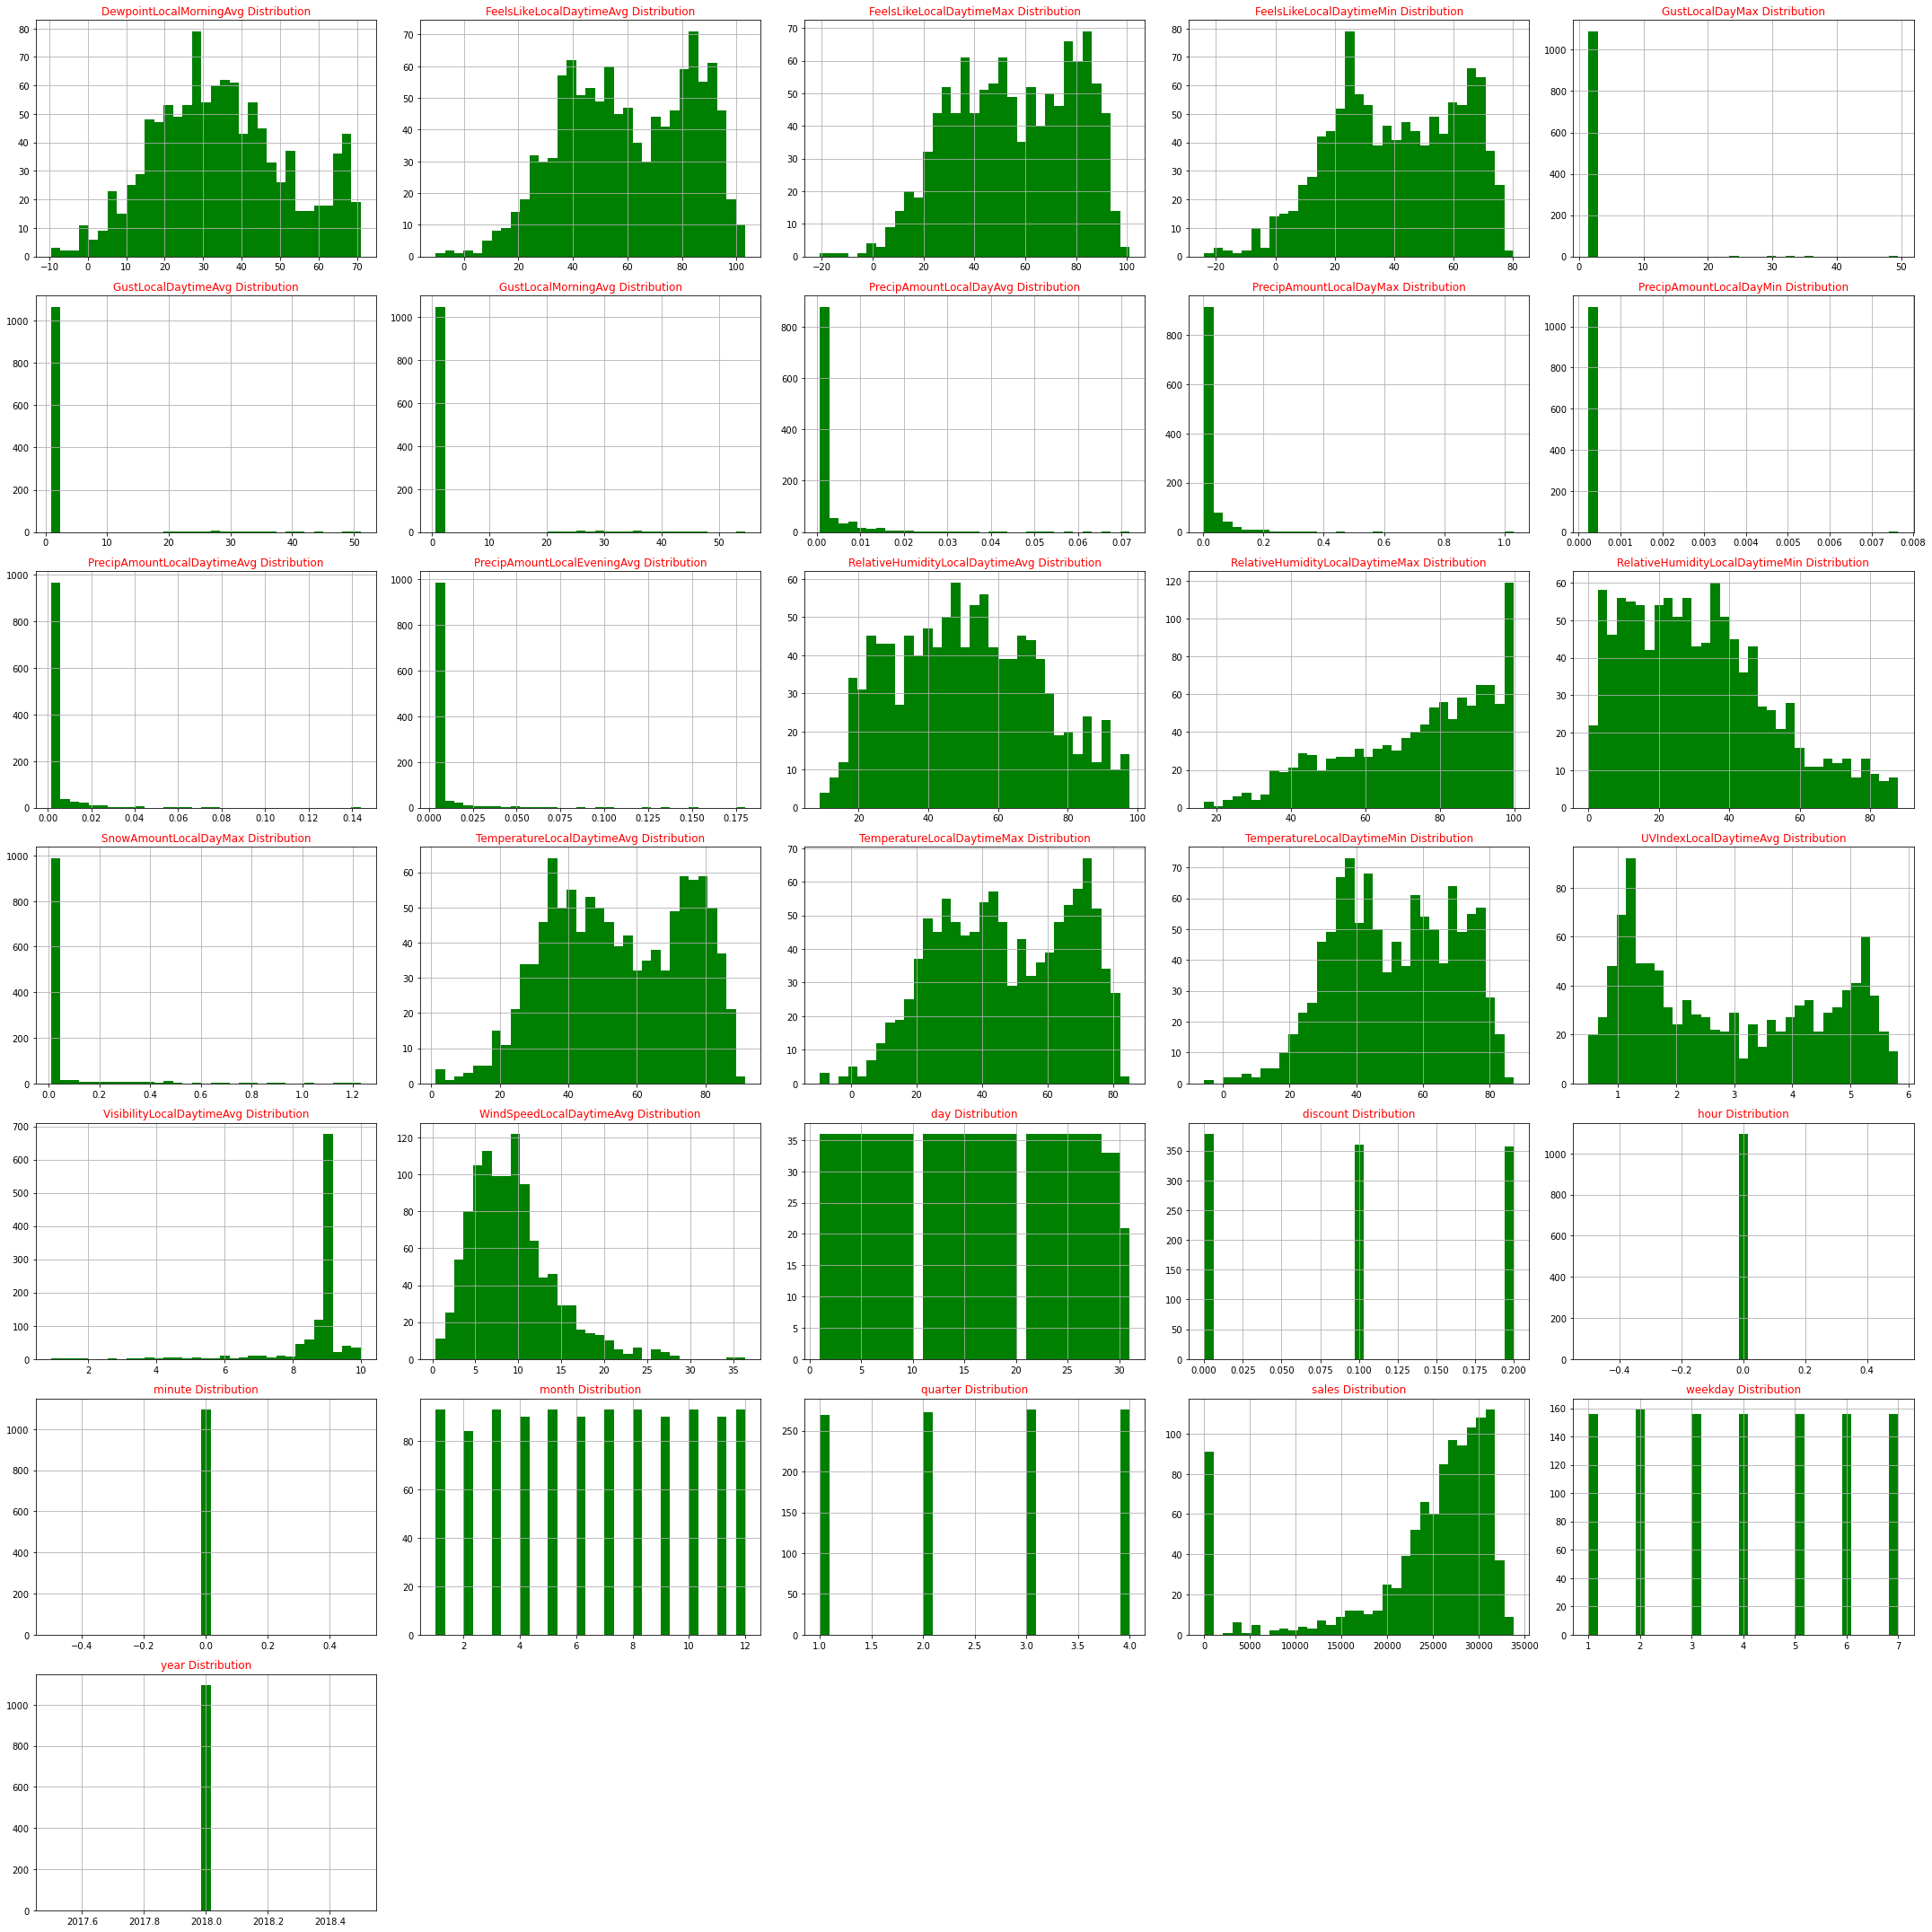

In [8]:
histograms_plot(df,list_columnsnumerical,7,5)

#### STEP 1.3.2 Exploring Categorical Data

Similar frequeny distribution of categorical variables. 

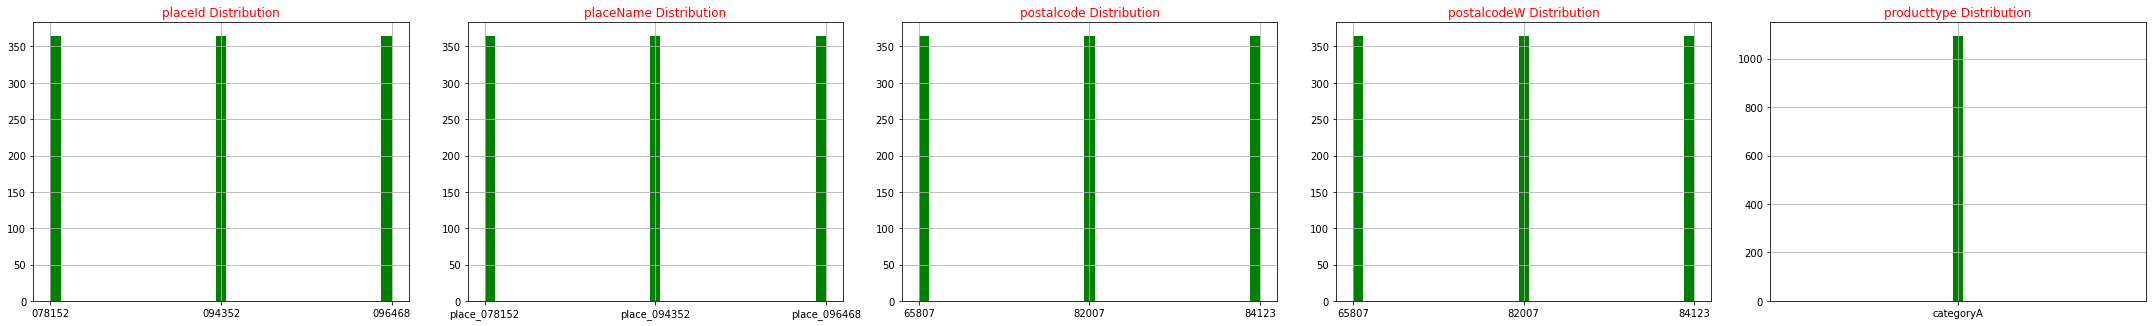

In [9]:
temp_categorical=list_columnscategorical
if 'date' in temp_categorical == True or 'dateW' in temp_categorical:
    temp_categorical.remove('date')
    temp_categorical.remove('dateW')
#removing these as these insights are not giving us any analytical insight 

histograms_plot(df,temp_categorical,7,5)

#### STEP 1.3.3 Exploring the relationship between weather variables and sales

In [10]:
scatter_df = df[list_colpick_weather + list_columnsother+list_variablesdependent]
scatter_df.head()

,DewpointLocalMorningAvg,FeelsLikeLocalDaytimeMin,FeelsLikeLocalDaytimeMax,FeelsLikeLocalDaytimeAvg,GustLocalDayMax,GustLocalDaytimeAvg,GustLocalMorningAvg,PrecipAmountLocalDayMax,PrecipAmountLocalDayMin,PrecipAmountLocalDayAvg,PrecipAmountLocalDaytimeAvg,PrecipAmountLocalEveningAvg,RelativeHumidityLocalDaytimeMin,RelativeHumidityLocalDaytimeMax,RelativeHumidityLocalDaytimeAvg,SnowAmountLocalDayMax,TemperatureLocalDaytimeMax,TemperatureLocalDaytimeMin,TemperatureLocalDaytimeAvg,UVIndexLocalDaytimeAvg,VisibilityLocalDaytimeAvg,WindSpeedLocalDaytimeAvg,hour,quarter,year,day,minute,weekday,month,sales
0,-7.675032,-17.159487,-0.845846,2.408276,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,34.408451,79.368269,55.192077,0.010339,-2.068455,4.450444,5.454486,1.239738,9.077558,6.149344,0,1,2018,1,0,2,1,0.00
1,14.614962,11.100513,20.754154,25.118282,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,56.208451,91.268269,76.867077,0.010339,12.871545,19.390444,20.799486,0.906404,9.751232,3.781852,0,1,2018,1,0,2,1,0.00
2,19.774932,20.820513,37.134154,40.718252,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,41.308451,80.968269,60.592077,0.010339,26.731545,31.990444,33.654474,0.989738,8.987045,2.178669,0,1,2018,1,0,2,1,0.00
3,-5.275038,-7.979487,11.034154,14.918294,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,25.208451,76.268269,45.458743,0.010339,5.851545,8.050444,13.374486,1.323071,9.040379,3.744569,0,1,2018,2,0,3,1,4020.66
4,-0.745050,0.660513,24.534154,25.928282,1.454665,0.902338,0.59834,0.003129,0.000235,0.000666,0.001574,0.003777,12.108451,55.168269,31.142077,0.010339,22.951545,17.770444,27.684504,0.989738,9.040638,14.034769,0,1,2018,2,0,3,1,15322.86


The following plots show sales trends compared to the weather measure type.

SALES TRENDS RELATED TO WEATHER MEASURES


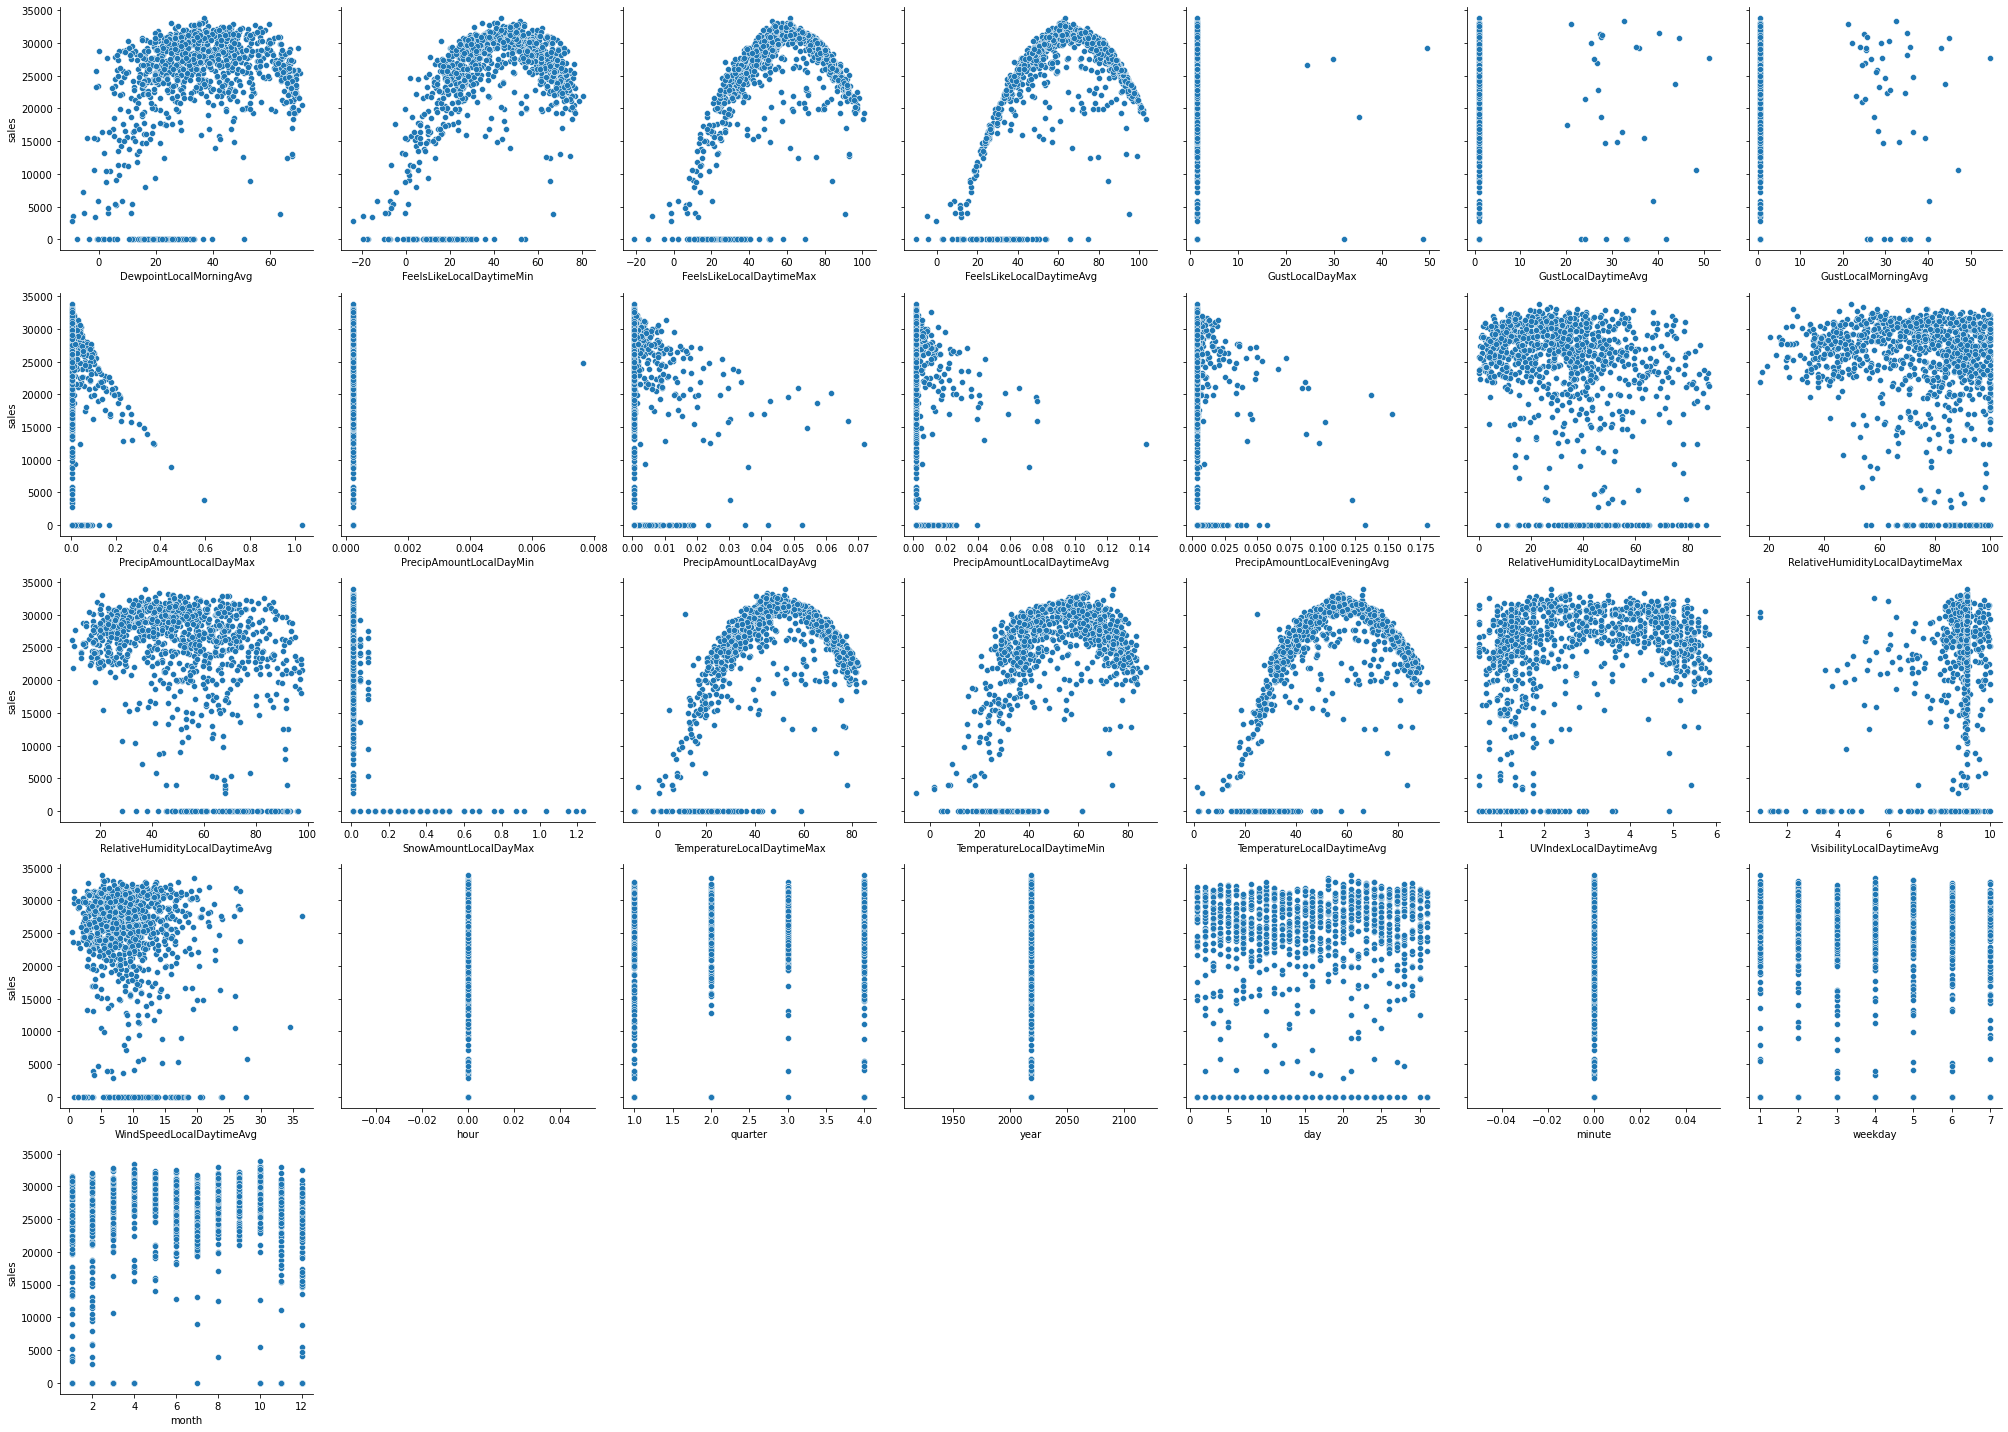

In [11]:
# plotting sales against weather and also temporal variables
print("SALES TRENDS RELATED TO WEATHER MEASURES")
x_column_names=list_colpick_weather + list_columnsother
g = sns.FacetGrid(pd.DataFrame(x_column_names), col=0, col_wrap=7, sharex=False, height = 4)
for ax, xvar in zip(g.axes, x_column_names):
    sns.set_style("darkgrid")
    sns.scatterplot(data=scatter_df, x=xvar, y="sales", ax=ax)
g.tight_layout();

In [12]:

# ----------------------------------------------------------------------------------------------------------------------
# Exploratory analysis
# ----------------------------------------------------------------------------------------------------------------------

#
dict_columnsagg_part2 = {}
for ii in list_variablesdependent:
    dict_columnsagg_part2.update({ii: "mean"})

print(dict_columnsagg_part2)

#
dict_columnsagg_part3 = {}
for ii in list_colpick_weather:
    dict_columnsagg_part3.update({ii: "mean"})

print(dict_columnsagg_part3)


#
for rr in range(len(list_columnscomboby), 0, -1):

    list_combos = list(itertools.combinations(list_columnscomboby, rr))
    
    for combo_now in list_combos:
        
        #
        list_columnscomboby_now = list(combo_now)
        list_columnstolambda = list(set(list_columnscomboby) - set(list_columnscomboby_now))
        
        #
        dict_columnsagg_part1 = {"date": "count"}
        for ii in list_columnstolambda:
            dict_columnsagg_part1.update({ii: lambda x: list(set(x))})

        print(dict_columnsagg_part1)

        #
        dict_columnsagg_full = {}
        dict_columnsagg_full.update(dict_columnsagg_part1)
        dict_columnsagg_full.update(dict_columnsagg_part2)
        dict_columnsagg_full.update(dict_columnsagg_part3)

        #
        dfA = df.groupby(list_columnscomboby_now, as_index=False).agg(dict_columnsagg_full).\
            reset_index(inplace=False, drop=True).\
            rename(columns={"date": "samplesize"})

        #
        temp = df.loc[:, list_columnscomboby_now].nunique().tolist()
        print("combo columns: " + str(list_columnscomboby_now))
        print(dfA.shape, temp, np.prod(temp))
#         mydfdescribe(dfA)
        display(dfA.sort_values(by=list_columnscomboby_now, ascending=[True]*len(list_columnscomboby_now)))


# ----------------------------------------------------------------------------------------------------------------------
# 
# ----------------------------------------------------------------------------------------------------------------------

# notify scientist: completed analyses
print("DONE: 'STEP 1.3: Explore Data' analysis")


{'sales': 'mean'}
{'DewpointLocalMorningAvg': 'mean', 'FeelsLikeLocalDaytimeMin': 'mean', 'FeelsLikeLocalDaytimeMax': 'mean', 'FeelsLikeLocalDaytimeAvg': 'mean', 'GustLocalDayMax': 'mean', 'GustLocalDaytimeAvg': 'mean', 'GustLocalMorningAvg': 'mean', 'PrecipAmountLocalDayMax': 'mean', 'PrecipAmountLocalDayMin': 'mean', 'PrecipAmountLocalDayAvg': 'mean', 'PrecipAmountLocalDaytimeAvg': 'mean', 'PrecipAmountLocalEveningAvg': 'mean', 'RelativeHumidityLocalDaytimeMin': 'mean', 'RelativeHumidityLocalDaytimeMax': 'mean', 'RelativeHumidityLocalDaytimeAvg': 'mean', 'SnowAmountLocalDayMax': 'mean', 'TemperatureLocalDaytimeMax': 'mean', 'TemperatureLocalDaytimeMin': 'mean', 'TemperatureLocalDaytimeAvg': 'mean', 'UVIndexLocalDaytimeAvg': 'mean', 'VisibilityLocalDaytimeAvg': 'mean', 'WindSpeedLocalDaytimeAvg': 'mean'}
{'date': 'count'}
combo columns: ['placeId', 'producttype']
(3, 26) [3, 1] 3


,placeId,producttype,samplesize,sales,DewpointLocalMorningAvg,FeelsLikeLocalDaytimeMin,FeelsLikeLocalDaytimeMax,FeelsLikeLocalDaytimeAvg,GustLocalDayMax,GustLocalDaytimeAvg,GustLocalMorningAvg,PrecipAmountLocalDayMax,PrecipAmountLocalDayMin,PrecipAmountLocalDayAvg,PrecipAmountLocalDaytimeAvg,PrecipAmountLocalEveningAvg,RelativeHumidityLocalDaytimeMin,RelativeHumidityLocalDaytimeMax,RelativeHumidityLocalDaytimeAvg,SnowAmountLocalDayMax,TemperatureLocalDaytimeMax,TemperatureLocalDaytimeMin,TemperatureLocalDaytimeAvg,UVIndexLocalDaytimeAvg,VisibilityLocalDaytimeAvg,WindSpeedLocalDaytimeAvg
0,078152,categoryA,365,24656.816685,44.946112,45.449937,60.825606,65.117778,1.610336,1.536475,1.598007,0.028735,0.000235,0.003882,0.004649,0.007467,43.059684,85.694660,62.797949,0.018645,50.644915,55.998498,58.247714,2.980193,8.691724,9.005493
1,094352,categoryA,365,22487.699151,26.762234,32.747855,48.434209,53.175428,1.877550,2.604465,3.258499,0.021325,0.000235,0.002825,0.003784,0.006738,26.062420,69.912615,45.543158,0.061574,41.851052,45.636909,49.420448,2.867950,8.689859,11.541720
2,096468,categoryA,365,24693.503808,32.608749,43.268732,57.818866,62.765197,1.454665,1.134596,1.085006,0.017485,0.000255,0.002718,0.003505,0.006359,26.652194,66.366620,44.952570,0.042051,49.018504,52.952800,56.520339,2.903476,8.736948,7.328435


{'date': 'count', 'producttype': <function <lambda> at 0x7fd109735dc0>}
combo columns: ['placeId']
(3, 26) [3] 3


,placeId,samplesize,producttype,sales,DewpointLocalMorningAvg,FeelsLikeLocalDaytimeMin,FeelsLikeLocalDaytimeMax,FeelsLikeLocalDaytimeAvg,GustLocalDayMax,GustLocalDaytimeAvg,GustLocalMorningAvg,PrecipAmountLocalDayMax,PrecipAmountLocalDayMin,PrecipAmountLocalDayAvg,PrecipAmountLocalDaytimeAvg,PrecipAmountLocalEveningAvg,RelativeHumidityLocalDaytimeMin,RelativeHumidityLocalDaytimeMax,RelativeHumidityLocalDaytimeAvg,SnowAmountLocalDayMax,TemperatureLocalDaytimeMax,TemperatureLocalDaytimeMin,TemperatureLocalDaytimeAvg,UVIndexLocalDaytimeAvg,VisibilityLocalDaytimeAvg,WindSpeedLocalDaytimeAvg
0,078152,365,[categoryA],24656.816685,44.946112,45.449937,60.825606,65.117778,1.610336,1.536475,1.598007,0.028735,0.000235,0.003882,0.004649,0.007467,43.059684,85.694660,62.797949,0.018645,50.644915,55.998498,58.247714,2.980193,8.691724,9.005493
1,094352,365,[categoryA],22487.699151,26.762234,32.747855,48.434209,53.175428,1.877550,2.604465,3.258499,0.021325,0.000235,0.002825,0.003784,0.006738,26.062420,69.912615,45.543158,0.061574,41.851052,45.636909,49.420448,2.867950,8.689859,11.541720
2,096468,365,[categoryA],24693.503808,32.608749,43.268732,57.818866,62.765197,1.454665,1.134596,1.085006,0.017485,0.000255,0.002718,0.003505,0.006359,26.652194,66.366620,44.952570,0.042051,49.018504,52.952800,56.520339,2.903476,8.736948,7.328435


{'date': 'count', 'placeId': <function <lambda> at 0x7fd109735820>}
combo columns: ['producttype']
(1, 26) [1] 1


,producttype,samplesize,placeId,sales,DewpointLocalMorningAvg,FeelsLikeLocalDaytimeMin,FeelsLikeLocalDaytimeMax,FeelsLikeLocalDaytimeAvg,GustLocalDayMax,GustLocalDaytimeAvg,GustLocalMorningAvg,PrecipAmountLocalDayMax,PrecipAmountLocalDayMin,PrecipAmountLocalDayAvg,PrecipAmountLocalDaytimeAvg,PrecipAmountLocalEveningAvg,RelativeHumidityLocalDaytimeMin,RelativeHumidityLocalDaytimeMax,RelativeHumidityLocalDaytimeAvg,SnowAmountLocalDayMax,TemperatureLocalDaytimeMax,TemperatureLocalDaytimeMin,TemperatureLocalDaytimeAvg,UVIndexLocalDaytimeAvg,VisibilityLocalDaytimeAvg,WindSpeedLocalDaytimeAvg
0,categoryA,1095,"[094352, 096468, 078152]",23946.006548,34.772365,40.488841,55.692894,60.352801,1.647517,1.758512,1.980504,0.022515,0.000241,0.003142,0.003979,0.006855,31.924766,73.991298,51.097892,0.040757,47.171491,51.529403,54.7295,2.917206,8.706177,9.291883


DONE: 'STEP 1.3: Explore Data' analysis


### STEP 2.1: Load Data and Predictive Models


#### Load the Deployment Space

The following code programmatically loads the deployment space using the *space_name* value in the configuration file. Alternatively, one can manually specify the space id.

In [17]:
# Specify a name for the space being created, the saved model and the model deployment
space_name = "{}_{}".format(name_offering, name_client)

from ibm_watson_machine_learning import APIClient
import os

location = os.environ['RUNTIME_ENV_REGION'] 

if ibmcloud_api_key != '':
    wml_credentials = {
        "apikey": ibmcloud_api_key,
        "url": 'https://' + location + '.ml.cloud.ibm.com'
    }
else:
    token = os.environ['USER_ACCESS_TOKEN']

    wml_credentials = {
        "token": token,
        "instance_id" : "openshift",
        "url": os.environ['RUNTIME_ENV_APSX_URL'],
        "version": "4.0"
     }
    
client = APIClient(wml_credentials)


In [19]:
# ----------------------------------------------------------------------------------------------------------------------
# LOAD DEPLOYMENT SPACE
# ----------------------------------------------------------------------------------------------------------------------

l_space_details = []
l_space_details_created_times = []
for space_details in client.spaces.get_details()['resources']:
    if space_details['entity']['name'] == space_name:
        space_id=space_details['metadata']['id']

# set this space as default space
client.set.default_space(space_id)

'SUCCESS'

Get the deployment id. If there are multiple deployments with the same name in the same space, we take the latest

### Load the Deployed Models

The following code programmatically loads the model deployment details.  If multiple deployments within the selected space have the same name, then the code uses the most recently created deployment. Alternatively, one can manually specify the each model deployment guid.

In [31]:
# ----------------------------------------------------------------------------------------------------------------------
# LOAD DEPLOYED MODELS
# ----------------------------------------------------------------------------------------------------------------------

#
model_deployments_dict = {}

#
for model in client.repository.get_details()['models']['resources']:
    
    # make model nameid
    model_nameid=model['metadata']['name']
    deployment_name=model_nameid.replace("(", "").replace(")", "").replace(",", "-").replace("'", "")

    # make model nameidtag
   # model_nameidtag = model_nameid.replace("_store", "").replace("_deploy", "").replace("(", "").replace(")", "").replace(",", "-").replace("'", "")


    
    # get the id of the deployments - 
    # if there are multiple deployments with the same name in the same space, we take the latest
    l_deployment_details = []
    l_deployment_details_created_times = []
                
    for deployment in client.deployments.get_details()['resources']:
        if deployment['entity']['name'] == deployment_name:            
                l_deployment_details.append(deployment)
                l_deployment_details_created_times.append(datetime.datetime.strptime(deployment['metadata']['created_at'], '%Y-%m-%dT%H:%M:%S.%fZ'))

    # get the index of the latest created date from the list and use that to get the deployment_id
    try:
        list_latest_index = l_deployment_details_created_times.index(max(l_deployment_details_created_times))
        deployment_id = l_deployment_details[list_latest_index]['metadata']['id']
        model_deployments_dict[model_nameid] = deployment_id
        
    except ValueError: 
        list_latest_index = 0

        
#
len(client.repository.get_details()['models']['resources'])
len(model_deployments_dict)

27

3

In [32]:
l_deployment_details_created_times

[datetime.datetime(2022, 8, 5, 11, 4, 36, 103000),
 datetime.datetime(2022, 8, 5, 10, 41, 29, 232000),
 datetime.datetime(2022, 8, 5, 11, 15, 8, 438000),
 datetime.datetime(2022, 8, 5, 10, 32, 42, 436000)]

### Load the Assets
The code also promotes needed data assets into the deployment space, making them accessible by a deployable "scoring" function (i.e., a function that computes predictions using data and deployed models). In this example, the data assets are the weather data and the client data.  

*Promote the assets into the deployment space. We will use the prep script for getting the raw data into the format required for scoring. We also need the prep metadata that was saved as json during the prep for training. This ensures that the user inputs specified for prepping the data for training are the same as the ones used for scoring. We add these assets into the deployment space. Also, we store the raw data dataset in the deployment space.*

In [33]:
# ----------------------------------------------------------------------------------------------------------------------
# LOAD DATA ASSETS
# ----------------------------------------------------------------------------------------------------------------------

# create "dict_modeldatascaler.json" data asset
asset_load_modeldatascaler = client.data_assets.create("dict_modeldatascaler.json", file_path="dict_modeldatascaler.json")

# create "config2.py" data asset
asset_load_config2 = client.data_assets.create("config2.py", file_path="config2.py")

# # create "config.py" data asset
# asset_load_config = client.data_assets.create("config.py", file_path="/project_data/data_asset/config.py")


# display successfully created data assets
client.data_assets.list()

Creating data asset...
SUCCESS
Creating data asset...
SUCCESS
-------------------------  ----------  -----  ------------------------------------
NAME                       ASSET_TYPE  SIZE   ASSET_ID
dict_modeldatascaler.json  data_asset  162    e1ba5405-c97f-4f5a-8eda-550fad0df058
dict_modeldatascaler.json  data_asset  162    b001374e-7551-46d5-b3fe-a6442507bc96
dict_modeldatascaler.json  data_asset  165    c910d711-45d1-41c1-addc-d0e6409626c7
config2.py                 data_asset  23849  50883d9d-7a49-45ca-9452-930ababee572
config2.py                 data_asset  23849  856983de-2e0c-41ea-b6d2-603e55b9ae86
dict_modeldatascaler.json  data_asset  165    9c2102ce-9a95-4eae-8e74-402237d676ed
dict_modeldatascaler.json  data_asset  162    e48909b9-982c-43f7-ab1f-58c4ea9dfd88
config2.py                 data_asset  23844  4eae8874-3cfb-41ad-8b5b-2c639555b0c8
config2.py                 data_asset  23844  65d78c23-e007-4174-a16a-95faff3fa99e
config2.py                 data_asset  23849  61dcca4

### Create the Deployable "Scoring" Function
Functions have deployment capabilities in WML, similarly to the deployment of models and other objects. The python client or REST API can send data to the deployed function. Using the deployed function allows the scoring of processed and prepared data with the deployed models either (a) all within the deployed scoring function or (b) partially inside and partially outside the deployed scoring function.

The creating scoring pipeline function begins by creating a dictionary of default parameters for mandatory input to the function. The dictionary contains all the ID values of all assets (e.g., metadata, data, scripts, model deployments) that have been promoted into the deployment space, the space ID itself, and additional information. Then the function creation entails the definition of the actual "score" function (i.e., code to make estimated predictions using the built deployed machine-learning models on data not involved in the predictive model building analysis) with the following considerations.


#### Scoring Pipeline Function

The function below takes new customers to be scored as payload. It preps the customer raw data, loads the models, executes the model scoring, and generates the predictions for each product.

The following rules are required to make a valid deployable function:

* The deployable function accepts default parameters (e.g., WML credentials, deployment space id, details of assets promoted in the space, and also a dictionary of model deployment guid values with its key being the model nameid). 
* The deployable function must include a nested function named "score".
* The score function accepts a dictionary that must include a key named "values" with its value being an array (e.g., pandas dataframe converted to a list); it is a good notion to include in this dictionary a key named "columns" (or whatever preferred name) with its value being an array (e.g., list of corresponding column names to data values).
* The score function must return an array with the name "predictions", with a list as the value, which in turn contains an array with the name "values". Example: ```{"predictions" : [{'values' : }]}```
* The assets are downloaded into the deployment space and imported as variables. The raw data to be scored is then prepared and the function calls the model deployment endpoint to score and return predictions. 

In [34]:
# get the assets that were stored in the space: this version of the WML package requires manually assigning the id values
datascaler_id = asset_load_modeldatascaler["metadata"]["guid"]
datascaler_name = "dict_modeldatascaler.json"

config_id = asset_load_config2["metadata"]["guid"]
config_name = "config2.py"
# config_id = asset_load_config["metadata"]["guid"]
# config_name = "config.py"

#
assets_dict = {"datascaler_name": datascaler_name, 
               "datascaler_id": datascaler_id, 
               "config_name": config_name,
               "config_id": config_id}

# make parameters of "scoring pipeline" analysis

# create the wml_credentials again. After already creating the client using the credentials, the instance_id gets updated to 999
# update the value

if ibmcloud_api_key == '':
    wml_credentials["instance_id"] = "openshift"  

ai_params = {"wml_credentials": wml_credentials, "space_id": space_id, "assets": assets_dict, "model_deployment_id": model_deployments_dict}

In [35]:
# make deployable "scoring pipeline" function
def scoring_pipeline(params=ai_params):

    # ..................................................................................................................
    # import modules
    # ..................................................................................................................
    
    #
    import datetime
    import itertools
#     import warnings
    
#     #
#     from sklearn.ensemble import RandomForestRegressor
#     from sklearn.svm import SVR
    
    #
    import numpy as np
    import pandas as pd
    import requests
    import os
    import json
    import time
    
    #
    from ibm_watson_machine_learning import APIClient
    
    # ..................................................................................................................
    # load deployment space
    # ..................................................................................................................

    # todo: understand why the "instance_id" field changes from "openshift" to "999" value
    #params["wml_credentials"]["instance_id"] = "openshift"
    
    # create the WML api client
    client = APIClient(params["wml_credentials"])
    
    # set the WML api client space
    client.set.default_space(params["space_id"])

    # ..................................................................................................................
    # load config info: "data prep for score function" only
    # ..................................................................................................................

    # download the config script and return its path
    file_config = client.data_assets.download(params["assets"]["config_id"], params["assets"]["config_name"])    
    
    # load configuration info
#     exec(open(file_config, "r", encoding="utf-8").read())
    config_script = __import__(os.path.basename(file_config).replace(".py", ""))
#     config_script = __import__(os.path.basename(file_config).replace(".py", ""), fromlist=["valu_rescaledata", "list_keepyears_apply", "makedatastrata"])

    valu_rescaledata = config_script.valu_rescaledata
    list_keepyears_apply = config_script.list_keepyears_apply
    
#     # ..................................................................................................................
#     # load config info: "data prep for score function" only
#     # ..................................................................................................................

#     # download the config script and return its path
#     client.data_assets.download(params["assets"]["config_id"], params["assets"]["config_name"])
    
#     # import "sys" library
#     import sys

#     # add project data path
#     if "/project_data/data_asset" not in sys.path:
#         sys.path.insert(0, "/project_data/data_asset")


#     # import configuration information
#     from config import valu_rescaledata, list_keepyears_apply, makedatastrata

    # ..................................................................................................................
    # load model dataset scalers
    # ..................................................................................................................

    # download the config script and return its path
    file_datascaler = client.data_assets.download(params["assets"]["datascaler_id"], params["assets"]["datascaler_name"])
    
    # load model data scalers as a file
    # note: mimetype is guessed when promoting the asset into the deployment space; 
    #     : thus save the object as a file type recognised by the mimetype library;
    #     : this hack does not impact the object type currenlty fortunately
#     dict_modeldatascaler = joblib.load(dict_modeldatascaler, "/project_data/data_asset/dict_modeldatascaler.json")
    with open(file_datascaler, "r") as f:
        dict_modeldatascaler = json.load(f)

    # make "data prep for score function" function
    def prep(df_payload):
        
        # ..................................................................................................................
        # compute stratified dataset
        # ..................................................................................................................

        #
        ttic = time.time()
        datastrata = config_script.makedatastrata(df_payload, "demo", list_keepyears_apply)
#         datastrata = makedatastrata(df_payload, "demo", list_keepyears_apply)
        ttoc = time.time()
        print("elapsed time of makedatastrata:", ttoc - ttic)
                
        # ..................................................................................................................
        # compute scaled dataset
        # ..................................................................................................................
        
        #
        prepped_data_dict = {}

        #
        for model_nameid in params["model_deployment_id"].keys():
                        
            # ..................................................................................................................
            
            # get "corresponding to built model" dataset
            print(model_nameid)
            temp = [(ii["name_data"] in model_nameid) for ii in datastrata]
            if np.array(temp).any():
                datasetnow = datastrata[temp.index(True)]
            else:
                print("skipped model")
                continue
            
            # get "corresponding to built model" dataset scaler
            datascalernow = dict_modeldatascaler[model_nameid]
            
            # ..................................................................................................................
 
            # get dataset info
            datanamenow = datasetnow["name_data"]
            q = datasetnow["q"]
            X = datasetnow["X"]
            y = datasetnow["y"]
            list_ivariables_num = datasetnow["variables_independent_num"]
            t = datasetnow["date"]

            # get column (variable) names
            # note: must preserve list order for the below "variables importance" analysis
            name_dvariable = y.name
            list_ivariables = X.columns.to_list() # note: includes transformed categorical variables
            list_ivariables_str = list(set(list_ivariables) - set(list_ivariables_num)) # note: see 1-above note
    #         print("dependent variable (aka criterion variable): {}".format(name_dvariable.upper()))

            # get column (variable) values then optionally transform numerical independent variables
            y = y.values
            if valu_rescaledata == True:
                list_ivariables = list_ivariables_num + list_ivariables_str # note: align with concat...
                # X1 = RobustScaler().fit_transform(X.loc[:, list_ivariables_num])
                X1 = datascalernow.transform(X.loc[:, list_ivariables_num])
                X2 = X.loc[:, list_ivariables_str]
                X = np.concatenate((X1, X2), axis=1)
            else:
                X = X.values

            # replace missing (e.g., nan) or/and invalid (e.g., infinite) values
            # todo: determine if a need of other imputation conditions or/and techniques
            print("any nan:", np.any(np.isnan(X)), "; ", "all finite:", np.all(np.isfinite(X)))
            X[np.isnan(X)] = -1
            X[~np.isfinite(X)] = -2
            print("any nan:", np.any(np.isnan(X)), "; ", "all finite:", np.all(np.isfinite(X)))
            
            # ..................................................................................................................

            # compute "formated for scoring function" dataset
            prepped_data_dict[model_nameid] = pd.DataFrame(data=X, columns=list_ivariables)

        
        # ..................................................................................................................
        # errorcheck stratified dataset
        # ..................................................................................................................

#         #
#         for model_nameid in product_list:
#             if prepped_data_dict[model_nameid] is None:
#                 print("Data prep filtered out customer data. Unable to score.", file=sys.stderr)
#                 return None

#             # handle empty data
#             if prepped_data_dict[model_nameid].shape[0] == 0:
#                 print("Data prep filtered out customer data. Unable to score.", file=sys.stderr)
#                 return None
        
#             # if a column does not exist in scoring but is in training, add the column to scoring dataset
#             for col in cols_used_for_training[model_nameid]:
#                 if col not in list(prepped_data_dict[model_nameid].columns):
#                     prepped_data_dict[model_nameid][col] = 0

#             # if a column exists in scoring but not in training, delete it from scoring dataset
#             for col in list(prepped_data_dict[model_nameid].columns):
#                 if col not in cols_used_for_training[model_nameid]:
#                     prepped_data_dict[model_nameid].drop(col, axis=1, inplace=True)

#             # make sure order of scoring columns is same as training dataset
#             prepped_data_dict[model_nameid] = prepped_data_dict[model_nameid][cols_used_for_training[model_nameid]]

                                 
        # return result: prepared datasets
        return prepped_data_dict
    
    
    # make score function
    def score(payload):
        
        # compute dataframe from payload
        df_payload = pd.DataFrame(data=payload["input_data"][0]["values"], columns = payload["input_data"][0]["columns"])
        
        # compute prepared data from dataframe
        prepped_data_dict = prep(df_payload)
        
        # compute predictions
        result = {}
        
        for model_nameid, prepped_data in prepped_data_dict.items():
            
            if prepped_data is None:
                # handle empty data
                return {"predictions" : [{'values': "Unable to score: no data for predictions."}]}
            elif prepped_data.shape[0] == 0:
                # handle empty data
                return {"predictions" : [{'values': "Unable to score: no data for predictions."}]}
            else:
                # handle non-empty data
                scoring_modeldeployid = params["model_deployment_id"][model_nameid]
                scoring_payload = {"input_data":  [{ "values" : prepped_data.values.tolist()}]}
                result[model_nameid] = client.deployments.score(scoring_modeldeployid, scoring_payload)
#                 .update({"dates": prepped_data.iloc[:, "date"].values.tolist()})

        # return result: predictions
        return {"predictions" : [{"values": result}]}
    
    # return result: score function
    return score

### Test the Deployable "Scoring" Function

Score the function using payload. 

In [36]:
# make input to predictive models: all rows
scoring_payload = [{"columns": df.columns.tolist(), "values": df.values.tolist()}]
payload_metadata = {client.deployments.ScoringMetaNames.INPUT_DATA: scoring_payload}

# compute predictions
scoring_pipeline(ai_params)(payload_metadata)

Successfully saved data asset content to file: 'config2.py'
DONE: 'STEP 0.1a: Import Software Packages' analysis
DONE: 'STEP 0.1b: Set Parameters' analysis
DONE: 'STEP 0.1c: Define Custom Functions' analysis
Successfully saved data asset content to file: 'dict_modeldatascaler.json'
dataset size (dfM): (1095, 34)
dependent variable (aka criterion variable): SALES
dependent variable has existence in the data: True
dataset: salesprediction_demo_('078152',); sample size: 365
dataset: salesprediction_demo_('094352',); sample size: 365
dataset: salesprediction_demo_('096468',); sample size: 365
elapsed time of makedatastrata: 0.018578052520751953
salesprediction_demo_('094352',)_RANDOMFOREST
any nan: False ;  all finite: True
any nan: False ;  all finite: True
salesprediction_demo_('096468',)_RANDOMFOREST
any nan: False ;  all finite: True
any nan: False ;  all finite: True
salesprediction_demo_('078152',)_RANDOMFOREST
any nan: False ;  all finite: True
any nan: False ;  all finite: True


{'predictions': [{'values': {"salesprediction_demo_('094352',)_RANDOMFOREST": {'predictions': [{'fields': ['prediction'],
       'values': [[10535.356666666667],
        [18538.184999999998],
        [24107.10666666667],
        [26174.688333333335],
        [27396.23],
        [26458.715],
        [24196.325],
        [29371.631666666664],
        [29913.155],
        [17752.72666666667],
        [10736.733333333334],
        [19863.881666666668],
        [21161.78],
        [26174.688333333335],
        [0.0],
        [6705.906666666667],
        [24107.10666666667],
        [29572.985],
        [29913.155],
        [12512.581666666665],
        [0.0],
        [6705.906666666667],
        [6965.179999999999],
        [22518.105],
        [25816.408333333336],
        [10086.616666666667],
        [15450.080000000002],
        [20402.27],
        [26458.715],
        [29572.985],
        [18538.184999999998],
        [0.0],
        [26174.688333333335],
        [26174.688333333335],
 

In [37]:
# make input to predictive models: one row
# scoring_payload = [{"columns": df.columns.tolist(), "values": df.iloc[0:1].values.tolist()}]
scoring_payload = [{"columns": df.columns.tolist(), "values": df.iloc[0:1].values.tolist()}]
payload_metadata = {client.deployments.ScoringMetaNames.INPUT_DATA: scoring_payload}

# compute predictions
scoring_pipeline(ai_params)(payload_metadata)

Successfully saved data asset content to file: 'config2.py'
Successfully saved data asset content to file: 'dict_modeldatascaler.json'
dataset size (dfM): (1, 34)
dependent variable (aka criterion variable): SALES
dependent variable has existence in the data: True
dataset: salesprediction_demo_('078152',); sample size: 1
elapsed time of makedatastrata: 0.009365320205688477
salesprediction_demo_('094352',)_RANDOMFOREST
skipped model
salesprediction_demo_('096468',)_RANDOMFOREST
skipped model
salesprediction_demo_('078152',)_RANDOMFOREST
any nan: False ;  all finite: True
any nan: False ;  all finite: True


{'predictions': [{'values': {"salesprediction_demo_('078152',)_RANDOMFOREST": {'predictions': [{'fields': ['prediction'],
       'values': [[4648.360000000001]]}]}}}]}

### Store then Deploy the "Scoring" Function

In code cells below, user can specify the name of the function and deployment. The code uses tags in the metadata to allow identifying the deployed function programmatically. 
Software Specification refers to the runtime used in the Notebook, WML training and WML deployment. We use the `default_py3.8` software specification to store the function. We get the ID of the software specification and include it in the metadata when storing the function. Available software specifications can be retrieved using `client.software_specifications.list()`.

In [38]:
software_spec_id  = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")

In [39]:
# ----------------------------------------------------------------------------------------------------------------------
# MAKE SCORING FUNCTION NAME INFO
# ----------------------------------------------------------------------------------------------------------------------

# make scoring function name info
function_name = "{}_scoring_pipeline".format(space_name).replace("_store", "").replace("_deploy", "")

# ----------------------------------------------------------------------------------------------------------------------
# STORE SCORING FUNCTION
# ----------------------------------------------------------------------------------------------------------------------

# make the metadata for the function storage    
metadata_functionstore = {
    client.repository.FunctionMetaNames.NAME : function_name,
    client.repository.FunctionMetaNames.TAGS : [ "{}_store".format(function_name)],
    client.repository.FunctionMetaNames.SOFTWARE_SPEC_UID: software_spec_id
}

# store the function
function_details = client.repository.store_function(function=scoring_pipeline, meta_props=metadata_functionstore)

# ----------------------------------------------------------------------------------------------------------------------
# DEPLOY SCORING FUNCTION
# ----------------------------------------------------------------------------------------------------------------------

# make the metadata for the function deployment    
metadata_functiondeploy = {
    client.deployments.ConfigurationMetaNames.NAME: function_name,
    client.deployments.ConfigurationMetaNames.TAGS : ["{}_deploy".format(function_name)],
    client.deployments.ConfigurationMetaNames.SERVING_NAME: function_name.replace('-','').lower().replace('_','')[:30]+''.join(random.choice(string.ascii_lowercase + string.digits) for _ in range(6))}

# deploy the function
function_deployment_details = client.deployments.create(artifact_uid=function_details["metadata"]["id"], meta_props=metadata_functiondeploy)



#######################################################################################

Synchronous deployment creation for uid: 'cd9f22f2-6fd7-40f2-bbc2-4c126799c85e' started

#######################################################################################


initializing...
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='4418ffa7-21d4-4cfa-9ac9-62503c644314'
------------------------------------------------------------------------------------------------




### STEP 2.2: Apply Predictive Models (Unblinded Data)
Get the guid of the deployed function, create payload and use the python client to score the data. The deployed function returns the predictions (a.k.a. scoring). 

The payload cantains two values. The first is the effective date for scoring. This is the date that the prediction is computed. The second value contains the location (e.g., place ID) for which the analysis makes the predictions.

In [ ]:

# get the deployed function guid
scoring_deployment_id = client.deployments.get_uid(function_deployment_details)
client.deployments.get_details(scoring_deployment_id)

# make input to predictive models: one row
scoring_payload = [{"columns": df.columns.tolist(), "values": df.iloc[0:1].values.tolist()}]
payload_metadata = {client.deployments.ScoringMetaNames.INPUT_DATA: scoring_payload}

# compute predictions
predictions = client.deployments.score(scoring_deployment_id, payload_metadata)
print(predictions)

<hr>

Sample Materials, provided under <a href="https://github.com/IBM/Industry-Accelerators/blob/master/CPD%20SaaS/LICENSE" target="_blank" rel="noopener noreferrer">license</a>. <br>
Licensed Materials - Property of IBM. <br>
© Copyright IBM Corp. 2020, 2021. All Rights Reserved. <br>
US Government Users Restricted Rights - Use, duplication or disclosure restricted by GSA ADP Schedule Contract with IBM Corp. <br>